In [1]:
import pandas as pd

In [35]:
df = pd.read_csv('data/acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [36]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
5038,CHEMBL4554172,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-...,10000.0
5039,CHEMBL4533844,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C(F)(F)F)CC3...,7570.0
5040,CHEMBL4570655,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2...,10000.0
5041,CHEMBL4571704,COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC...,15500.0


In [37]:
import numpy as np

In [38]:
df

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
5038,CHEMBL4554172,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-...,10000.0
5039,CHEMBL4533844,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C(F)(F)F)CC3...,7570.0
5040,CHEMBL4570655,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2...,10000.0
5041,CHEMBL4571704,COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC...,15500.0


In [39]:
df['standard_value_norm'] = df['standard_value'].apply(lambda x: (x>1e8)*1e8 + (x<=1e8)*x)

In [40]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0
...,...,...,...,...
5038,CHEMBL4554172,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-...,10000.0,10000.0
5039,CHEMBL4533844,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C(F)(F)F)CC3...,7570.0,7570.0
5040,CHEMBL4570655,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2...,10000.0,10000.0
5041,CHEMBL4571704,COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC...,15500.0,15500.0


In [41]:
df['pIC50'] = df['standard_value'].apply(lambda x: -np.log10(x*(10**-9)))

In [45]:
df

,molecule_chembl_id,canonical_smiles,standard_value,standard_value_norm,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,750.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,100.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,50000.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,300.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,800.0,6.096910
...,...,...,...,...,...
5038,CHEMBL4554172,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4cccc(F)c4)CC3)sc2-...,10000.0,10000.0,5.000000
5039,CHEMBL4533844,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C(F)(F)F)CC3...,7570.0,7570.0,5.120904
5040,CHEMBL4570655,Cc1ccc(-c2nc(NC(=O)C3CCN(Cc4ccccc4C)CC3)sc2-c2...,10000.0,10000.0,5.000000
5041,CHEMBL4571704,COc1cc(O)c2c(c1)C1=C(c3c(O)c(O)cc(C)c3-c3cc(OC...,15500.0,15500.0,4.809668


In [50]:
df['canonical_len'] = df['canonical_smiles'].apply(lambda x: len(x))

<AxesSubplot:>

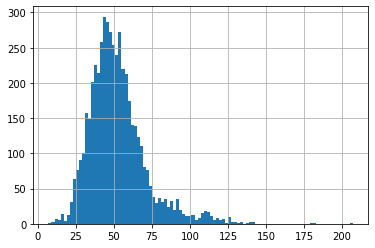

In [55]:
df['canonical_len'].hist(bins=100)

In [112]:
max_sequence_len = df['canonical_len'].max()
max_sequence_len

207

In [69]:
max_len_idx = df['canonical_len'].argmax()
min_len_idx = df['canonical_len'].argmin()

In [70]:
df.iloc[max_len_idx].canonical_smiles

'C[C@@]12CC[C@H]3[C@]4(C)CCC[C@@]5(C)C(=O)OCC[N+](C)(C)CCCCCCCCC[N+](C)(C)CCOC(=O)[C@]6(C)CCC[C@]7(C)[C@@H]6CC[C@@]68C[C@@H](OC(=O)CCCCCCCCC(=O)O[C@@H]1C[C@@]3(CC[C@@H]45)C2)[C@@](C)(CC[C@@H]76)C8.[Br-].[Br-]'

In [71]:
df.iloc[min_len_idx].canonical_smiles

'NC(=O)O'

In [92]:
from collections import Counter

In [94]:
text = ''
for cs in df['canonical_smiles']:
    text = text + cs

In [104]:
vocab_hist = dict(Counter(text))

In [105]:
vocab_hist

{'C': 56150,
 'O': 12122,
 'c': 64065,
 '1': 14750,
 'n': 3932,
 '(': 20907,
 '-': 1808,
 '2': 11730,
 '3': 7073,
 ')': 20907,
 '=': 7661,
 'o': 712,
 'N': 9143,
 'l': 1444,
 'S': 536,
 'F': 1023,
 '[': 5400,
 '@': 4124,
 'H': 2208,
 ']': 5400,
 '/': 1544,
 '\\': 338,
 '+': 1158,
 '.': 1207,
 'B': 564,
 'r': 540,
 '4': 3026,
 '#': 331,
 'I': 101,
 's': 211,
 '5': 854,
 '6': 224,
 'P': 34,
 'a': 1,
 '7': 18,
 '8': 6,
 'e': 35,
 'i': 2}

# Canonical_smiles To secuence

In [162]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [152]:
tk = Tokenizer(char_level=True, lower=False)

In [153]:
tk.fit_on_texts(X)

In [156]:
tk.word_index

{'c': 1,
 'C': 2,
 '(': 3,
 ')': 4,
 '1': 5,
 'O': 6,
 '2': 7,
 'N': 8,
 '=': 9,
 '3': 10,
 '[': 11,
 ']': 12,
 '@': 13,
 'n': 14,
 '4': 15,
 'H': 16,
 '-': 17,
 '/': 18,
 'l': 19,
 '.': 20,
 '+': 21,
 'F': 22,
 '5': 23,
 'o': 24,
 'B': 25,
 'r': 26,
 'S': 27,
 '\\': 28,
 '#': 29,
 '6': 30,
 's': 31,
 'I': 32,
 'e': 33,
 'P': 34,
 '7': 35,
 '8': 36,
 'i': 37,
 'a': 38}

In [159]:
X_seq = tk.texts_to_sequences(X)

In [171]:
max([len(x_i) for x_i in X_seq])

207

In [172]:
max_sequence_len

207

In [173]:
X_seq_pad = pad_sequences(X_seq)

In [181]:
X_seq_pad[max_len_idx]

array([ 2, 11,  2, 13, 13, 12,  5,  7,  2,  2, 11,  2, 13, 16, 12, 10, 11,
        2, 13, 12, 15,  3,  2,  4,  2,  2,  2, 11,  2, 13, 13, 12, 23,  3,
        2,  4,  2,  3,  9,  6,  4,  6,  2,  2, 11,  8, 21, 12,  3,  2,  4,
        3,  2,  4,  2,  2,  2,  2,  2,  2,  2,  2,  2, 11,  8, 21, 12,  3,
        2,  4,  3,  2,  4,  2,  2,  6,  2,  3,  9,  6,  4, 11,  2, 13, 12,
       30,  3,  2,  4,  2,  2,  2, 11,  2, 13, 12, 35,  3,  2,  4, 11,  2,
       13, 13, 16, 12, 30,  2,  2, 11,  2, 13, 13, 12, 30, 36,  2, 11,  2,
       13, 13, 16, 12,  3,  6,  2,  3,  9,  6,  4,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  9,  6,  4,  6, 11,  2, 13, 13, 16, 12,  5,  2, 11,
        2, 13, 13, 12, 10,  3,  2,  2, 11,  2, 13, 13, 16, 12, 15, 23,  4,
        2,  7,  4, 11,  2, 13, 13, 12,  3,  2,  4,  3,  2,  2, 11,  2, 13,
       13, 16, 12, 35, 30,  4,  2, 36, 20, 11, 25, 26, 17, 12, 20, 11, 25,
       26, 17, 12], dtype=int32)

In [182]:
X_seq_pad[min_len_idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 8, 2, 3, 9, 6, 4, 6], dtype=int32)

# Split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_seq_pad, y, test_size=0.2)

In [192]:
y_test

5001    5.950782
4810    4.357535
4275    3.698970
1614    4.200659
4218    5.522879
          ...   
3601    5.112946
283     4.958607
3481    5.636388
4373    5.000000
2535    4.984640
Name: pIC50, Length: 1009, dtype: float64

# Network

In [394]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import backend as K

In [375]:

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [370]:
vocab_size = len(vocab_hist)

In [371]:
vocab_size

38

In [408]:
model = Sequential()
model.add(Embedding(vocab_size + 1, 64, input_length=max_sequence_len))
model.add(Bidirectional(LSTM(100, return_sequences=False, activation='tanh')))
model.add(Dense(50))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

In [409]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 207, 64)           2496      
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 200)               132000    
_________________________________________________________________
dense_34 (Dense)             (None, 50)                10050     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 51        
Total params: 144,797
Trainable params: 144,697
Non-trainable params: 100
_____________________________________________

In [410]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse', metrics=[R2])

In [411]:
mcp = ModelCheckpoint('models/best_model_{epoch}', save_best_only=True, save_format="h5")

In [415]:
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), callbacks=[])

Epoch 1/10
32/32 [==============================] - 6s 173ms/step - loss: 0.5760 - R2: 0.7858 - val_loss: 1.7875 - val_R2: 0.3514
Epoch 2/10
32/32 [==============================] - 5s 172ms/step - loss: 0.5864 - R2: 0.7833 - val_loss: 1.8537 - val_R2: 0.3417
Epoch 3/10
32/32 [==============================] - 5s 172ms/step - loss: 0.5515 - R2: 0.7977 - val_loss: 1.3926 - val_R2: 0.5089
Epoch 4/10
32/32 [==============================] - 6s 173ms/step - loss: 0.5498 - R2: 0.7940 - val_loss: 1.3059 - val_R2: 0.5361
Epoch 5/10
32/32 [==============================] - 6s 173ms/step - loss: 0.5318 - R2: 0.8027 - val_loss: 1.9991 - val_R2: 0.2928
Epoch 6/10
32/32 [==============================] - 6s 173ms/step - loss: 0.5357 - R2: 0.8009 - val_loss: 1.2317 - val_R2: 0.5729
Epoch 7/10
32/32 [==============================] - 6s 173ms/step - loss: 0.5365 - R2: 0.7995 - val_loss: 1.4660 - val_R2: 0.4830
Epoch 8/10
32/32 [==============================] - 6s 173ms/step - loss: 0.5336 - R2: 0.8

In [416]:
y_pred = model.predict(X_test)

# Score

In [417]:
r2 = 1 - ((y_test.values - y_pred.reshape(-1)) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

In [418]:
r2
# 0.4984533246797399

0.5844427878770673

# Evaluación

<function matplotlib.pyplot.show(close=None, block=None)>

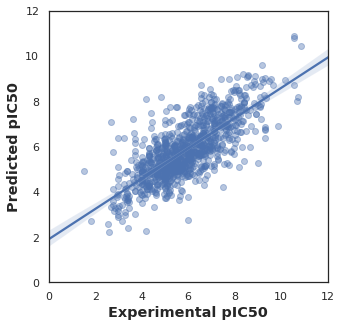

In [419]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show